## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm

## Data exploration

In [2]:
df = pd.read_excel('data.xlsx') 

In [5]:
df.head()

,Triaxiality,Lode,strain,NVF,orientation,Hconc
0,1,-1,0.000000,1.00000,0,0
1,1,-1,0.004718,1.00610,0,0
2,1,-1,0.009848,1.01285,0,0
3,1,-1,0.014838,1.01928,0,0
4,1,-1,0.019852,1.02591,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Triaxiality  1164 non-null   int64  
 1   Lode         1164 non-null   int64  
 2   strain       1164 non-null   float64
 3   NVF          1164 non-null   float64
 4   orientation  1164 non-null   int64  
 5   Hconc        1164 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 54.7 KB


## visualize and save correlation between each input and output

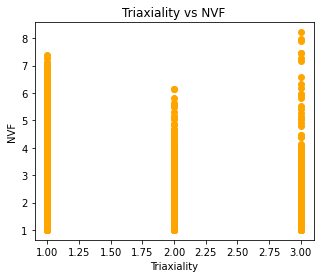

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['Triaxiality'],df["NVF"], color='orange')
ax.set(title = "Triaxiality vs NVF",
       xlabel = 'Triaxiality',
       ylabel = 'NVF')
ax.set()
fig.savefig('Triaxiality vs NVF.png')
plt.show();

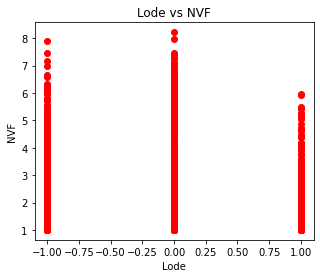

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['Lode'],df["NVF"], color='red')
ax.set(title = "Lode vs NVF",
       xlabel = 'Lode',
       ylabel = 'NVF')
ax.set()
fig.savefig('Lode vs NVF.png')
plt.show();

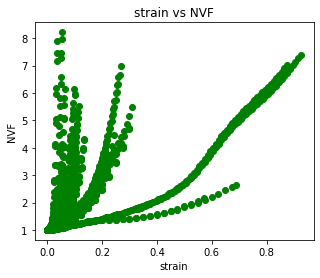

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['strain'],df["NVF"], color='green')
ax.set(title = "strain vs NVF",
       xlabel = 'strain',
       ylabel = 'NVF')
ax.set()
fig.savefig('strain vs NVF.png')
plt.show();

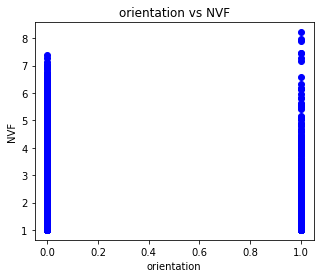

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['orientation'],df["NVF"], color='blue')
ax.set(title = "orientation vs NVF",
       xlabel = 'orientation',
       ylabel = 'NVF')
ax.set()
fig.savefig('orientation vs NVF.png')
plt.show();

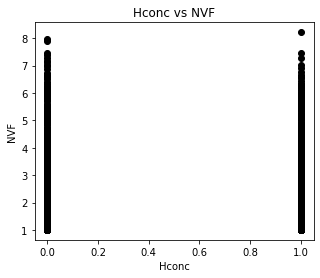

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['Hconc'],df["NVF"], color='black')
ax.set(title = "Hconc vs NVF",
       xlabel = 'Hconc',
       ylabel = 'NVF')
ax.set()
fig.savefig('Hconc vs NVF.png')
plt.show();

In [8]:
df.isna().sum()

Triaxiality    0
Lode           0
strain         0
NVF            0
orientation    0
Hconc          0
dtype: int64

Data is cleaned to start building ml

In [10]:
# calculate the correlation matrix
corr = df.corr()
corr

,Triaxiality,Lode,strain,NVF,orientation,Hconc
Triaxiality,1.000000,0.060352,-0.512246,-0.130685,0.044857,0.010515
Lode,0.060352,1.000000,0.207794,-0.007832,0.156762,0.007920
strain,-0.512246,0.207794,1.000000,0.592044,-0.189416,-0.026790
NVF,-0.130685,-0.007832,0.592044,1.000000,-0.052972,-0.020206
orientation,0.044857,0.156762,-0.189416,-0.052972,1.000000,0.003707
Hconc,0.010515,0.007920,-0.026790,-0.020206,0.003707,1.000000


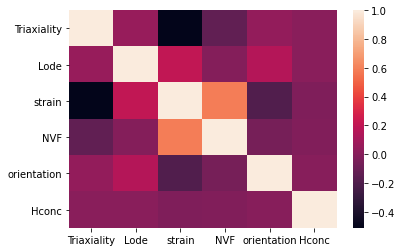

In [11]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

## Prepare data to fit

In [3]:
X = df.drop('NVF', axis=1)
y = df['NVF']

In [86]:
X.columns

Index(['Triaxiality', 'Lode', 'strain', 'orientation', 'Hconc'], dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((931, 5), (233, 5), (931,), (233,))

## Fitting the model

In [20]:
regr = svm.SVR(kernel='linear')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.26136322868282047

In [21]:
regr = svm.SVR(kernel='rbf')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.3183011178933418

In [57]:
regr = svm.SVR(kernel='rbf',C=100)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.648219136448164

## Searching best hyperparameter using gridsearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
grid = {
    'kernel': ['rbf'],
    'gamma' : ['scale', 'auto'],
    'C':[10, 20, 50, 100, 10000],
    'epsilon' : [0.1,0.001, 0.05]
}

model = svm.SVR()

# setup RandomizedSearchCV
gs_reg = GridSearchCV(estimator=model, 
                      param_grid=grid,
                      cv = 5,
                      verbose=2)
# fit the GridSearchCV version of clf
gs_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=10, epsilon=0.1, gamma=scale, kernel=rbf ......................
[CV] ....... C=10, epsilon=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=scale, kernel=rbf ......................
[CV] ....... C=10, epsilon=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=scale, kernel=rbf ......................
[CV] ....... C=10, epsilon=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=scale, kernel=rbf ......................
[CV] ....... C=10, epsilon=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=scale, kernel=rbf ......................
[CV] ....... C=10, epsilon=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=auto, kernel=rbf .......................
[CV] ........ C=10, epsilon=0.1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=auto, kernel=rbf .......................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=10, epsilon=0.1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=auto, kernel=rbf .......................
[CV] ........ C=10, epsilon=0.1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=10, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=10, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=10, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=10, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=10, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] .

[CV] ..... C=50, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=50, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=scale, kernel=rbf ....................
[CV] ..... C=50, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] ...... C=50, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] ...... C=50, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] ...... C=50, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] ...... C=50, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.001, gamma=auto, kernel=rbf .....................
[CV] .

[CV] .. C=10000, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.9s
[CV] C=10000, epsilon=0.001, gamma=scale, kernel=rbf .................
[CV] .. C=10000, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.7s
[CV] C=10000, epsilon=0.001, gamma=scale, kernel=rbf .................
[CV] .. C=10000, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.8s
[CV] C=10000, epsilon=0.001, gamma=scale, kernel=rbf .................
[CV] .. C=10000, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.7s
[CV] C=10000, epsilon=0.001, gamma=scale, kernel=rbf .................
[CV] .. C=10000, epsilon=0.001, gamma=scale, kernel=rbf, total=   0.7s
[CV] C=10000, epsilon=0.001, gamma=auto, kernel=rbf ..................
[CV] ... C=10000, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.6s
[CV] C=10000, epsilon=0.001, gamma=auto, kernel=rbf ..................
[CV] ... C=10000, epsilon=0.001, gamma=auto, kernel=rbf, total=   0.8s
[CV] C=10000, epsilon=0.001, gamma=auto, kernel=rbf ..................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.0s finished


In [98]:
gs_reg.best_params_

{'C': 10000, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [99]:
gs_reg.score(X_test, y_test)

0.8370925011614831

**So the model improved by gridsearchCV**

## Predict 

In [100]:
gs_y_preds = gs_reg.predict(X_test)
gs_y_preds[45]

1.5908449206317385

In [101]:
np.array(y_test)[45]

1.505451

## Prediction visualization

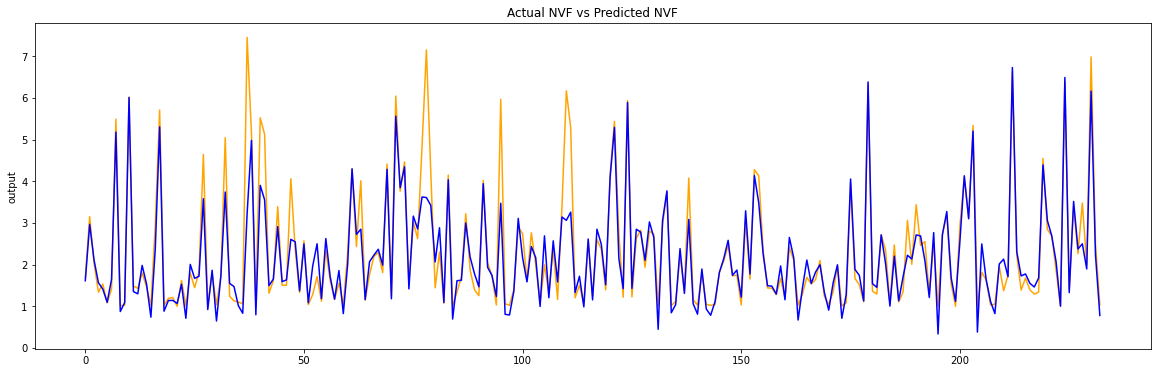

In [102]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(np.array(y_test), color='orange')
ax.set(title = "Actual NVF vs Predicted NVF",
       ylabel = 'output')

ax.plot(gs_y_preds, color='blue')
ax.set()
fig.savefig('actual vs predicted.png')
plt.show();

## Saving the model for the future prediction

In [94]:
import pickle
pickle.dump(gs_reg, open("svm_regressor_model.pkl", "wb"))

## Loading a model for the future use

In [95]:
loaded_model = pickle.load(open("svm_regressor_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.773822314016082

## Predicting using loaded model

In [96]:
loaded_model.predict([[1,-1,0,0,0]])

array([0.58305581])

## Using higher C value

In [6]:
regr = svm.SVR(C = 10000, epsilon = 0.1, gamma= 'scale', kernel= 'rbf')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.8370925011614831

In [7]:
regr_y_pred = regr.predict(X_test)

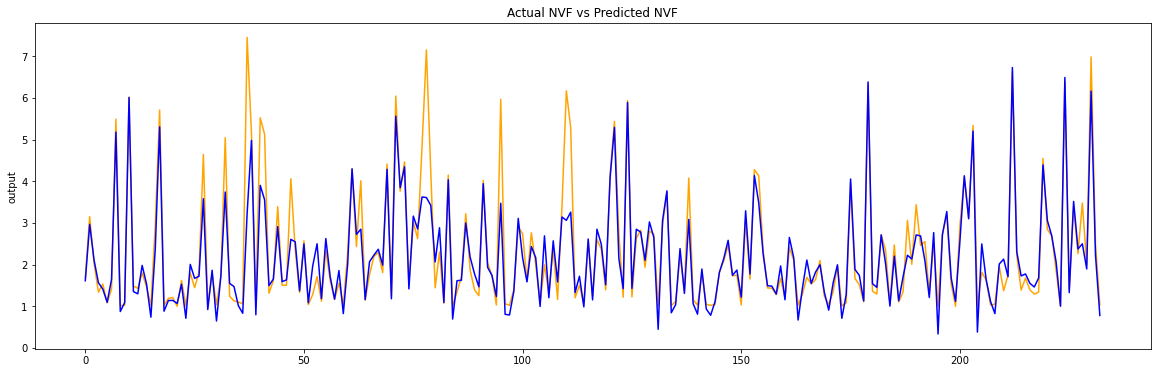

In [8]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(np.array(y_test), color='orange')
ax.set(title = "Actual NVF vs Predicted NVF",
       ylabel = 'output')

ax.plot(regr_y_pred, color='blue')
ax.set()
fig.savefig('actual vs predicted.png')
plt.show();

## results / prediction on entire datasets and save them in a csv file

In [9]:
results = regr.predict(X)

In [10]:
results

array([1.04315716, 1.02691023, 1.01353873, ..., 3.96720051, 4.20435813,
       4.35502071])

In [11]:
# save results array as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file
print("results is saving....")
savetxt('result.csv', results, delimiter=',')
print("results saved on file 'result.csv'")

It gives very high score

## Saving the model

In [105]:
pickle.dump(gs_reg, open("svm_regressor_model_C10000.pkl", "wb"))

In [107]:
loaded_model2 = pickle.load(open("svm_regressor_model_C10000.pkl", "rb"))
loaded_model2.score(X_test, y_test)

0.8370925011614831